<a href="https://colab.research.google.com/github/yrsheld/Practice/blob/main/my_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convolutional Network

## Import and Setup

In [1]:
%tensorflow_version 2.x  # this line is not required unless you are in a notebook
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


## Dataset
CIFAR Image Dataset, built into tensorflow. Out task is to classifiy 10 everyday objects. The data set contains 60,000 32x32 color images with 6000 images of each class.

In [19]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

## Preprocessing

In [20]:
# Rescaling value from [0, 255] to [0,1]
rescale = tf.keras.Sequential([
    layers.Rescaling(1./255)      # normalize to [0, 1]
])

train_images, test_images = rescale(train_images), rescale(test_images)

# For these kind of simple rescaling, we could also do it manually
# Normalize pixel values between 0 and 1
# train_images, test_images = train_images / 255.0, test_images / 255.0

In [21]:
train_images[0].shape   # 32x32 RGB image

TensorShape([32, 32, 3])

In [22]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

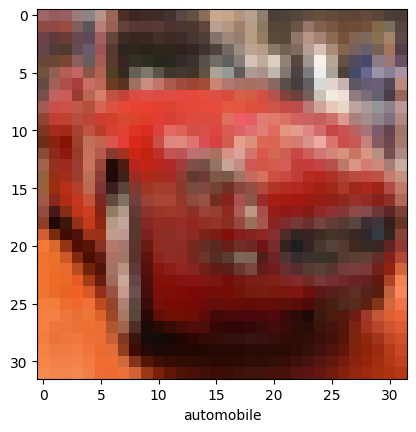

In [23]:
# Look at one image
IMG_INDEX = 5

plt.imshow(train_images[IMG_INDEX], cmap = plt.cm.binary)
plt.xlabel(class_names[train_labels[IMG_INDEX][0]])
plt.show()

## CNN Architecture
A common architecture for a CNN is a stack of **Conv2D** and **MaxPooling2D** layers **followed by a few denesly connected layers.** To idea is that the stack of convolutional and maxPooling layers extract the features from the image. Then these features are flattened and fed to densly connected layers that determine the class of an image based on the presence of features.

We will start by building the **Convolutional Base**.

In [32]:
model = tf.keras.Sequential([
  layers.Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)),  # 32 filters (3x3)
  layers.MaxPooling2D((2,2)),
  layers.Conv2D(64, (3,3), activation='relu'), # 64 filters (3x3)
  layers.MaxPooling2D((2,2)),
  layers.Conv2D(64, (3,3), activation='relu'),  # 64 filters (3x3)
  layers.MaxPooling2D((2,2))
])

In [33]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 2, 2, 64)        

## Add dense layers

In [34]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))    # output layer

In [35]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 2, 2, 64)        

## Training

In [31]:
def plot_history(history):
  fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))
  ax1.plot(history.history['loss'], label='loss')
  ax1.plot(history.history['val_loss'], label='val loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Cross Entropy')
  ax1.grid(True)

  ax2.plot(history.history['accuracy'], label='accuracy')
  ax2.plot(history.history['val_accuracy'], label='val accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.grid(True)

  plt.show()

In [38]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics = ['accuracy'])

history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 100s 63ms/step - loss: 1.5351 - accuracy: 0.4385 - val_loss: 1.2565 - val_accuracy: 0.5488
Epoch 2/10
1563/1563 [==============================] - 77s 49ms/step - loss: 1.1896 - accuracy: 0.5795 - val_loss: 1.1169 - val_accuracy: 0.6042
Epoch 3/10
1563/1563 [==============================] - 79s 50ms/step - loss: 1.0497 - accuracy: 0.6318 - val_loss: 1.1066 - val_accuracy: 0.6118
Epoch 4/10
1563/1563 [==============================] - 94s 60ms/step - loss: 0.9533 - accuracy: 0.6652 - val_loss: 0.9949 - val_accuracy: 0.6533
Epoch 5/10
1563/1563 [==============================] - 77s 49ms/step - loss: 0.8846 - accuracy: 0.6897 - val_loss: 0.9939 - val_accuracy: 0.6574
Epoch 6/10
1563/1563 [==============================] - 80s 51ms/step - loss: 0.8242 - accuracy: 0.7123 - val_loss: 0.8916 - val_accuracy: 0.6896
Epoch 7/10
1563/1563 [==============================] - 79s 51ms/step - loss: 0.7779 - accuracy: 0.7275 - val_loss: 0.9261 

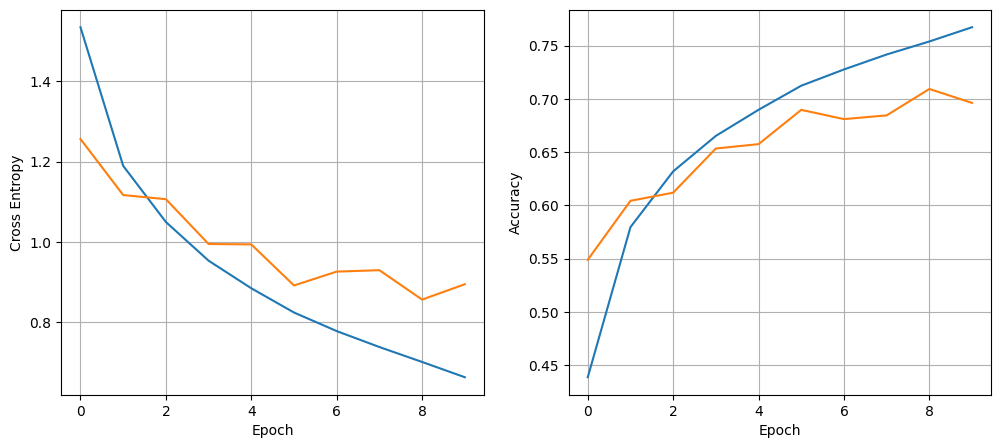

In [43]:
plot_history(history)

## Evaluating the model

In [44]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(test_acc)

313/313 - 4s - loss: 0.8946 - accuracy: 0.6961 - 4s/epoch - 12ms/step
0.6960999965667725


## Data Augmentation

In [24]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
    layers.RandomRotation(factor=(-0.2, 0.2), fill_mode='nearest')
])

In [ ]:
plt.figure(figsize=(10,10))
my_img = tf.cast(tf.expand_dims(train_images[7], 0), tf.float32)  # make the image to a batch

# Plot original image
ax = plt.subplot(3, 3, 1)
plt.imshow(my_img[0])
plt.title('original')
plt.axis('off')

for i in range(2, 10):
  augmented_image = data_augmentation(my_img)
  ax = plt.subplot(3, 3, i)
  plt.imshow(augmented_image[0])
  plt.axis("off")



## Using a Pretrained Model

In [10]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers

In [3]:
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

(raw_train, raw_validation, raw_test), metadata = tfds.load(
    'cats_vs_dogs',
    split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
    with_info=True,
    as_supervised=True
)

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.0. Subsequent calls will reuse this data.


In [ ]:
# Create a function object that we can use to get labels
get_label_name = metadata.features['label'].int2str

# Display 5 images from the dataset
for image, label in raw_train.take(5):
  plt.figure()
  plt.imshow(image)
  plt.title(get_label_name(label))

### Data Preprocessing

In [7]:
IMG_SIZE = 160  # Resize all images

def prepare(ds):
  resize_and_rescale = tf.keras.Sequential([
      layers.Rescaling(1./127.5, offset=-1),   #[-1, 1]
      layers.Resizing(IMG_SIZE, IMG_SIZE)
  ])

  ds = ds.map(lambda x, y: (resize_and_rescale(tf.cast(x, tf.float32)), y))
  return ds

In [11]:
train = prepare(raw_train)
validation = prepare(raw_validation)
test = prepare(raw_test)

In [ ]:
# Or we can also define it manually
"""
IMG_SIZE = 160  # Resize all images

def format_example(image, label):
  
  # returns an image that is reshaped to IMG_SIZE
  
  image = tf.cast(image, tf.float32)
  image = (image/127.5) - 1
  image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
  return image, label

train = raw_train.map(format_example)
validation = raw_validation.map(format_example)
test = raw_test.map(format_example)"""

In [ ]:
# have a look at images
for image, label in train.take(2):
  plt.figure()
  plt.imshow(image)
  plt.title(get_label_name(label))

### Shuffle and batch the images

In [13]:
# Shuffle the image
BATCH_SIZE = 32
SHUFFLE_BUFFER_SIZE = 1000

train_batches = train.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
validation_batches = validation.batch(BATCH_SIZE)
test_batches = test.batch(BATCH_SIZE)

Look at the shape of original image vs. new image.

In [14]:
for img, label in raw_train.take(2):
  print("Original shape:", img.shape)

for img, label in train.take(2):
  print("New shape:", img.shape)

Original shape: (262, 350, 3)
Original shape: (409, 336, 3)
New shape: (160, 160, 3)
New shape: (160, 160, 3)


### Picking a pretrained model

The model we are going to use as the convolutional base for our model is the **MobileNet V2** developed at Google. This model is trained on 1.4 million images and has 1000 different classes.

We want to use this model but only its convolutional base. So, when we load in the model, we'll specify that we don't want to load the top (classification) layer. We'll tell the model what input shape to expect and to use the predetermined weights from *imagenet* (Googles dataset).


In [15]:
IMG_SHAPE = (IMG_SIZE, IMG_SIZE, 3)

# Create the base model from the pre-trained model MobileNet V2
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,       # Whether to include the final classifiacation layers
                                               weights='imagenet')      # weight initialization (from weights pretrained on ImageNet)

9406464/9406464 [==============================] - 0s 0us/step


In [ ]:
base_model.summary()

The base_model will simply output a shape (32, 5, 5 1280) tensor that is a feature extraction from our original (1, 160, 160, 3) image. 
32 means we have 32 filters.

In [17]:
for image, _ in train_batches.take(1):
  pass

feature_batch = base_model(image)
print(feature_batch.shape)

(32, 5, 5, 1280)


### Freezing the base

In [ ]:
base_model.trainable=False
base_model.summary()

### Add classifier

Average the entire 5x5 area of each 2D feature map, and return a 1280 element vector per filter.

In [21]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()

In [22]:
# One single neuron for binary classification
prediction_layer = tf.keras.layers.Dense(1)

In [23]:
# Combine together
model = tf.keras.Sequential([
    base_model,
    global_average_layer,
    prediction_layer
])

In [24]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_160 (Funct  (None, 5, 5, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 1)                 1281      
                                                                 
Total params: 2,259,265
Trainable params: 1,281
Non-trainable params: 2,257,984
_________________________________________________________________


### Training
Same as before. First compile, then fit to the training dataset.

optimizer: tf.keras.optimizers.RMSProp
loss: binary cross entropy (for binary classification)

In [26]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [27]:
# Evaluate the model, before training
validation_steps=20

loss0, accuracy0 = model.evaluate(validation_batches, steps=validation_steps)

20/20 [==============================] - 12s 522ms/step - loss: 1.0125 - accuracy: 0.4719


In [29]:
# Train on our images
initial_epochs = 3
history = model.fit(train_batches,
                    epochs = initial_epochs,
                    validation_data=validation_batches)


Epoch 1/3
582/582 [==============================] - 327s 555ms/step - loss: 0.2432 - accuracy: 0.8810 - val_loss: 0.0951 - val_accuracy: 0.9652
Epoch 2/3
582/582 [==============================] - 312s 534ms/step - loss: 0.0768 - accuracy: 0.9729 - val_loss: 0.0645 - val_accuracy: 0.9751
Epoch 3/3
582/582 [==============================] - 288s 493ms/step - loss: 0.0599 - accuracy: 0.9776 - val_loss: 0.0550 - val_accuracy: 0.9794


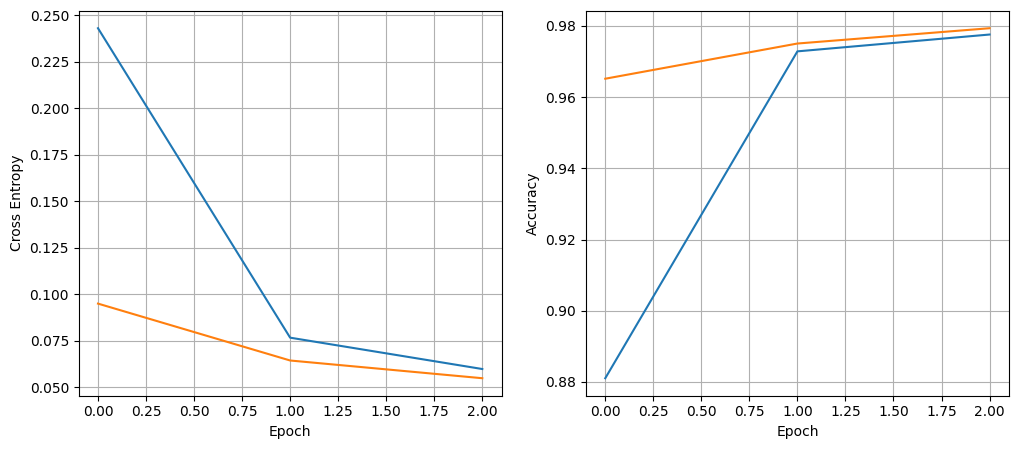

In [32]:
plot_history(history)

In [33]:
acc = history.history['accuracy']    # accuracy of each epoch
print(acc)

[0.8810316920280457, 0.972864031791687, 0.9775927066802979]


### Save model
Save the model and reload it at anytime in the future

In [34]:
model.save("dogs_vs_cats.h5")
new_model = tf.keras.models.load_model('dogs_vs_cats.h5')

In [42]:
# Test on 3 images
for image, label in test_batches.take(1):
  result = (new_model.predict(image) > 0).astype(int).reshape(-1)
  print("Predicted: ", result)
  print("True labels: ", label)
  print(result==label)

1/1 [==============================] - 1s 1s/step
Predicted:  [0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0]
True labels:  tf.Tensor([0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0], shape=(32,), dtype=int64)
tf.Tensor(
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True], shape=(32,), dtype=bool)
